In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv("Data/data.csv")
df.head()

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,6/17/2022 15:07,ISEE,Call,10/21/2022,10.0,9.54,5.05,7,360,183.60K,4.07K,4.71,0
1,6/17/2022 15:05,CVNA,Call,1/19/2024,60.0,23.52,4.60,7,634,310.66K,130,155.05,0
2,6/17/2022 14:51,PTLO,Put,2/17/2023,15.0,15.19,3.50,7,800,281.00K,0,1.39,0
3,6/17/2022 14:39,TWLO,Call,6/24/2022,86.0,84.51,2.95,5,722,198.80K,436,2.48,0
4,6/17/2022 13:56,ATUS,Put,9/16/2022,7.0,8.62,0.68,5,6.27K,501.84K,8.63K,23.13,0


In [3]:
df.shape

(7827, 13)

In [4]:
df.dtypes

Time        object
Sym         object
C/P         object
Exp         object
Strike     float64
Spot       float64
BidAsk     float64
Orders       int64
Vol         object
Prems       object
OI          object
Diff(%)    float64
ITM          int64
dtype: object

In [5]:
len(df.Sym.unique())

1107

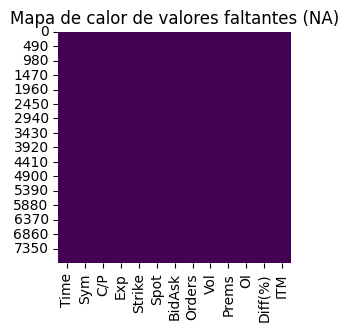

In [6]:
plt.figure(figsize=(3, 3))
sns.heatmap(df.isna(), cmap='viridis', cbar=False)
plt.title('Mapa de calor de valores faltantes (NA)')
plt.show()

In [7]:
df.isna().any().any()

np.False_

In [8]:
def conv2num(value):
    if value.endswith('K'):
        return float(value[:-1]) * 1000
    elif value.endswith('M'):
        return float(value[:-1]) * 1000000
    else:
        return float(value)

In [9]:
df.Vol = df.Vol.apply(conv2num)
df.Prems = df.Prems.apply(conv2num)
df.OI = df.OI.apply(conv2num)

In [10]:
df['C/P'] = df['C/P'].astype('category')

In [11]:
df.Exp = pd.to_datetime(df.Exp, format='%m/%d/%Y')

In [12]:
df.Time = pd.to_datetime(df.Time, format='%m/%d/%Y %H:%M')

In [13]:
df.head()

,Time,Sym,C/P,Exp,Strike,Spot,BidAsk,Orders,Vol,Prems,OI,Diff(%),ITM
0,2022-06-17 15:07:00,ISEE,Call,2022-10-21,10.0,9.54,5.05,7,360.0,183600.0,4070.0,4.71,0
1,2022-06-17 15:05:00,CVNA,Call,2024-01-19,60.0,23.52,4.60,7,634.0,310660.0,130.0,155.05,0
2,2022-06-17 14:51:00,PTLO,Put,2023-02-17,15.0,15.19,3.50,7,800.0,281000.0,0.0,1.39,0
3,2022-06-17 14:39:00,TWLO,Call,2022-06-24,86.0,84.51,2.95,5,722.0,198800.0,436.0,2.48,0
4,2022-06-17 13:56:00,ATUS,Put,2022-09-16,7.0,8.62,0.68,5,6270.0,501840.0,8630.0,23.13,0


In [14]:
df.dtypes

Time       datetime64[ns]
Sym                object
C/P              category
Exp        datetime64[ns]
Strike            float64
Spot              float64
BidAsk            float64
Orders              int64
Vol               float64
Prems             float64
OI                float64
Diff(%)           float64
ITM                 int64
dtype: object